## Рубежный контроль №2

### Выполнила: Мащенко Е.И., ИУ5-24М
### Алгоритм SARSA

Для проведения работы была выбрана среда обучения с подкреплением CliffWalking из библиотеки Gym.
Проведем подбор гиперпараметров для алгоритма SARSA. Критерий оптимизации – суммарная награда. В класс SARSA_Agent добавлен метод sum_rewards, подсчитывающий итоговую суммарную награду.

In [1]:
! pip install gymnasium

In [2]:
import gymnasium as gym
import numpy as np
from pprint import pprint
import matplotlib.pyplot as plt
from tqdm import tqdm

In [3]:
# ************************************ БАЗОВЫЙ АГЕНТ *****************************************

class BasicAgent:
    '''
    Базовый агент, от которого наследуются стратегии обучения
    '''

    # Наименование алгоритма
    ALGO_NAME = '---'

    def __init__(self, env, eps=0.1):
        # Среда
        self.env = env
        # Размерности Q-матрицы
        self.nA = env.action_space.n
        self.nS = env.observation_space.n
        #и сама матрица
        self.Q = np.zeros((self.nS, self.nA))
        # Значения коэффициентов
        # Порог выбора случайного действия
        self.eps=eps
        # Награды по эпизодам
        self.episodes_reward = []


    def print_q(self):
        print('Вывод Q-матрицы для алгоритма ', self.ALGO_NAME)
        print(self.Q)


    def get_state(self, state):
        '''
        Возвращает правильное начальное состояние
        '''
        if type(state) is tuple:
            # Если состояние вернулось с виде кортежа, то вернуть только номер состояния
            return state[0]
        else:
            return state 


    def greedy(self, state):
        '''
        <<Жадное>> текущее действие
        Возвращает действие, соответствующее максимальному Q-значению
        для состояния state
        '''
        return np.argmax(self.Q[state])


    def make_action(self, state):
        '''
        Выбор действия агентом
        '''
        if np.random.uniform(0,1) < self.eps:
            
            # Если вероятность меньше eps
            # то выбирается случайное действие
            return self.env.action_space.sample()
        else:
            # иначе действие, соответствующее максимальному Q-значению
            return self.greedy(state)


    def draw_episodes_reward(self):
        # Построение графика наград по эпизодам
        fig, ax = plt.subplots(figsize = (15,10))
        y = self.episodes_reward
        x = list(range(1, len(y)+1))
        plt.plot(x, y, '-', linewidth=1, color='green')
        plt.title('Награды по эпизодам')
        plt.xlabel('Номер эпизода')
        plt.ylabel('Награда')
        plt.show()


    def learn():
        '''
        Реализация алгоритма обучения
        '''
        pass


In [10]:
# ************************************ SARSA *****************************************

class SARSA_Agent(BasicAgent):
    '''
    Реализация алгоритма SARSA
    '''
    # Наименование алгоритма
    ALGO_NAME = 'SARSA'


    def __init__(self, env, eps=0.015, lr=0.1, gamma=0.97, num_episodes=20000):
        # Вызов конструктора верхнего уровня
        super().__init__(env, eps)
        # Learning rate
        self.lr=lr
        # Коэффициент дисконтирования
        self.gamma = gamma
        # Количество эпизодов
        self.num_episodes=num_episodes
        # Постепенное уменьшение eps
        self.eps_decay=0.00005
        self.eps_threshold=0.01


    def learn(self):
        '''
        Обучение на основе алгоритма SARSA
        '''
        self.episodes_reward = []
        # Цикл по эпизодам
        for ep in tqdm(list(range(self.num_episodes))):
            # Начальное состояние среды
            state = self.get_state(self.env.reset())
            # Флаг штатного завершения эпизода
            done = False
            # Флаг нештатного завершения эпизода
            truncated = False
            # Суммарная награда по эпизоду
            tot_rew = 0

            # По мере заполнения Q-матрицы уменьшаем вероятность случайного выбора действия
            if self.eps > self.eps_threshold:
                self.eps -= self.eps_decay

            # Выбор действия
            action = self.make_action(state) 

            # Проигрывание одного эпизода до финального состояния
            while not (done or truncated):
                
                # Выполняем шаг в среде
                next_state, rew, done, truncated, _ = self.env.step(action)

                # Выполняем следующее действие 
                next_action = self.make_action(next_state) 
                
                # Правило обновления Q для SARSA
                self.Q[state][action] = self.Q[state][action] + self.lr * \
                    (rew + self.gamma * self.Q[next_state][next_action] - self.Q[state][action])

                # Следующее состояние считаем текущим
                state = next_state
                action = next_action
                # Суммарная награда за эпизод
                tot_rew += rew
                if (done or truncated):
                    self.episodes_reward.append(tot_rew)

    def sum_rewards(self):
        # Суммарная награда
        sum_rewards = sum(self.episodes_reward)
        print('Cуммарная награда SARSA: ', sum_rewards)

In [5]:
!pip install pygame 

In [6]:
def play_agent(agent):
    '''
    Проигрывание сессии для обученного агента
    '''
    env2 = gym.make('CliffWalking-v0', render_mode='human') 
    state = env2.reset()[0]
    done = False
    while not done:
        action = agent.greedy(state)
        next_state, reward, terminated, truncated, _ = env2.step(action)
        env2.render()
        state = next_state
        if terminated or truncated:
            done = True


100%|██████████████████████████████████████████████████████████████████████████| 20000/20000 [00:07<00:00, 2522.84it/s]


Вывод Q-матрицы для алгоритма  SARSA
[[ -11.37114039  -11.38682899  -11.37973562  -11.47439914]
 [ -10.8938849   -10.87695896  -10.88054056  -10.95669466]
 [ -10.22243111  -10.20507836  -10.20727266  -10.32338474]
 [  -9.61838289   -9.49948007   -9.50304533   -9.5389843 ]
 [  -8.85174604   -8.76727551   -8.76829295   -8.77571385]
 [  -8.07594673   -8.01065996   -8.01297096   -8.02861512]
 [  -7.39968158   -7.23037616   -7.23070208   -7.24091761]
 [  -6.46830146   -6.42428982   -6.42640238   -6.52794336]
 [  -5.69527288   -5.61392053   -5.60262978   -5.63375425]
 [  -4.87840289   -4.77175576   -4.73286883   -5.06325686]
 [  -3.96584709   -3.85976545   -4.04330622   -4.27353905]
 [  -3.10784432   -3.12907452   -2.93345942   -3.33107757]
 [ -11.87863363  -10.96374391  -12.41243662  -11.65504861]
 [ -11.50355161  -10.30392883  -11.61025787  -11.79399189]
 [ -10.84310518   -9.50696354  -10.9001192   -11.14332681]
 [ -10.1641814    -8.76827787  -10.16766751  -10.43712966]
 [  -9.46705441   -

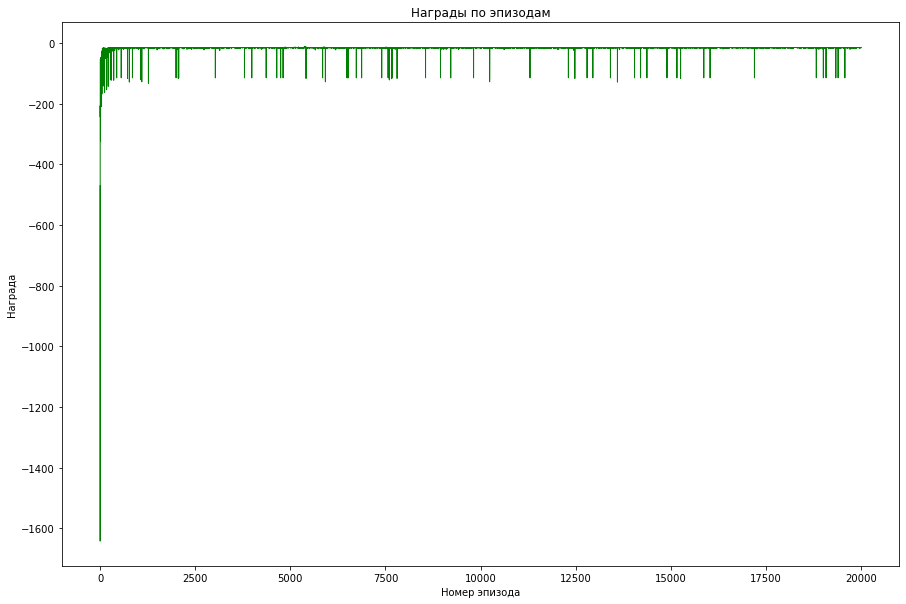

Cуммарная награда SARSA:  -321703


In [11]:
env = gym.make('CliffWalking-v0')
agent = SARSA_Agent(env)
agent.learn()
agent.print_q()
agent.draw_episodes_reward()
agent.sum_rewards()
# play_agent(agent)